In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import wave

TensorFlow version: 2.6.0


In [12]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ipd

In [13]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mel.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mel.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mel.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mel.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [15]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test) 

In [16]:
X_test = X_test.iloc[:,1:2]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0],1, 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)


In [17]:
#builing our CNN model
#forming model
model=Sequential()


model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(1,1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

opt_sgd = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.0, decay=0.0, nesterov=False)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
opt_rmp = tensorflow.keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 1, 128)        

In [18]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 1, 1, 64)          1664      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 1, 64)          256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 1, 128)         0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 1, 128)        

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4499, 1, 1, 1), (4233, 1, 1, 1), (4499, 10), (4233, 10))

In [20]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 250
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model_mel = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/250
18/18 [==============================] - 8s 224ms/step - loss: 2.2460 - accuracy: 0.1720 - val_loss: 2.2930 - val_accuracy: 0.1212

Epoch 00001: val_loss improved from inf to 2.29300, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 2/250
18/18 [==============================] - 4s 221ms/step - loss: 2.1953 - accuracy: 0.1825 - val_loss: 2.2907 - val_accuracy: 0.1191

Epoch 00002: val_loss improved from 2.29300 to 2.29067, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 3/250
18/18 [==============================] - 4s 202ms/step - loss: 2.1882 - accuracy: 0.1847 - val_loss: 2.2896 - val_accuracy: 0.1068

Epoch 00003: val_loss improved from 2.29067 to 2.28956, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 4/250
18/18 [==============================] - 4s 215ms/step - loss: 2.1791 - accuracy: 0.1916 - val_loss: 2.2893 - val_accuracy: 0.1068

Epoch 00004: val_loss improved from 2.28956 to 2.28933, saving model to saved_models\weig

Epoch 35/250
18/18 [==============================] - 4s 210ms/step - loss: 2.1207 - accuracy: 0.2152 - val_loss: 2.2154 - val_accuracy: 0.1732

Epoch 00035: val_loss improved from 2.22231 to 2.21540, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 36/250
18/18 [==============================] - 4s 227ms/step - loss: 2.1317 - accuracy: 0.2116 - val_loss: 2.2074 - val_accuracy: 0.1843

Epoch 00036: val_loss improved from 2.21540 to 2.20743, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 37/250
18/18 [==============================] - 4s 209ms/step - loss: 2.1310 - accuracy: 0.2058 - val_loss: 2.2031 - val_accuracy: 0.1899

Epoch 00037: val_loss improved from 2.20743 to 2.20313, saving model to saved_models\weights.best.basic_cnn.hdf5
Epoch 38/250
18/18 [==============================] - 4s 212ms/step - loss: 2.1228 - accuracy: 0.2109 - val_loss: 2.1961 - val_accuracy: 0.2001

Epoch 00038: val_loss improved from 2.20313 to 2.19609, saving model to saved_mod

18/18 [==============================] - 4s 196ms/step - loss: 2.1154 - accuracy: 0.2169 - val_loss: 2.1943 - val_accuracy: 0.1864

Epoch 00074: val_loss did not improve from 2.16750
Epoch 75/250
18/18 [==============================] - 4s 201ms/step - loss: 2.1114 - accuracy: 0.2156 - val_loss: 2.1887 - val_accuracy: 0.1902

Epoch 00075: val_loss did not improve from 2.16750
Epoch 76/250
18/18 [==============================] - 4s 203ms/step - loss: 2.1080 - accuracy: 0.2165 - val_loss: 2.2251 - val_accuracy: 0.1793

Epoch 00076: val_loss did not improve from 2.16750
Epoch 77/250
18/18 [==============================] - 4s 201ms/step - loss: 2.1134 - accuracy: 0.2169 - val_loss: 2.2193 - val_accuracy: 0.1866

Epoch 00077: val_loss did not improve from 2.16750
Epoch 78/250
18/18 [==============================] - 4s 206ms/step - loss: 2.1154 - accuracy: 0.2212 - val_loss: 2.2319 - val_accuracy: 0.1559

Epoch 00078: val_loss did not improve from 2.16750
Epoch 79/250
18/18 [=============

18/18 [==============================] - 4s 210ms/step - loss: 2.1071 - accuracy: 0.2272 - val_loss: 2.2098 - val_accuracy: 0.1753

Epoch 00116: val_loss did not improve from 2.16750
Epoch 117/250
18/18 [==============================] - 4s 217ms/step - loss: 2.1023 - accuracy: 0.2245 - val_loss: 2.2071 - val_accuracy: 0.1869

Epoch 00117: val_loss did not improve from 2.16750
Epoch 118/250
18/18 [==============================] - 4s 216ms/step - loss: 2.1035 - accuracy: 0.2194 - val_loss: 2.2168 - val_accuracy: 0.1914

Epoch 00118: val_loss did not improve from 2.16750
Epoch 119/250
18/18 [==============================] - 4s 218ms/step - loss: 2.1040 - accuracy: 0.2249 - val_loss: 2.2320 - val_accuracy: 0.1795

Epoch 00119: val_loss did not improve from 2.16750
Epoch 120/250
18/18 [==============================] - 4s 212ms/step - loss: 2.1037 - accuracy: 0.2258 - val_loss: 2.2159 - val_accuracy: 0.1914

Epoch 00120: val_loss did not improve from 2.16750
Epoch 121/250
18/18 [========


Epoch 00157: val_loss did not improve from 2.16750
Epoch 158/250
18/18 [==============================] - 4s 213ms/step - loss: 2.1026 - accuracy: 0.2207 - val_loss: 2.2397 - val_accuracy: 0.1817

Epoch 00158: val_loss did not improve from 2.16750
Epoch 159/250
18/18 [==============================] - 4s 216ms/step - loss: 2.1001 - accuracy: 0.2180 - val_loss: 2.2063 - val_accuracy: 0.1859

Epoch 00159: val_loss did not improve from 2.16750
Epoch 160/250
18/18 [==============================] - 4s 207ms/step - loss: 2.1029 - accuracy: 0.2198 - val_loss: 2.2223 - val_accuracy: 0.1869

Epoch 00160: val_loss did not improve from 2.16750
Epoch 161/250
18/18 [==============================] - 4s 199ms/step - loss: 2.0993 - accuracy: 0.2234 - val_loss: 2.2061 - val_accuracy: 0.1897

Epoch 00161: val_loss did not improve from 2.16750
Epoch 162/250
18/18 [==============================] - 4s 199ms/step - loss: 2.1015 - accuracy: 0.2176 - val_loss: 2.1981 - val_accuracy: 0.1852

Epoch 00162: v

18/18 [==============================] - 1s 82ms/step - loss: 2.0963 - accuracy: 0.2267 - val_loss: 2.2324 - val_accuracy: 0.1897

Epoch 00199: val_loss did not improve from 2.16750
Epoch 200/250
18/18 [==============================] - 2s 92ms/step - loss: 2.0963 - accuracy: 0.2227 - val_loss: 2.2101 - val_accuracy: 0.1880

Epoch 00200: val_loss did not improve from 2.16750
Epoch 201/250
18/18 [==============================] - 2s 101ms/step - loss: 2.0968 - accuracy: 0.2229 - val_loss: 2.2060 - val_accuracy: 0.1892

Epoch 00201: val_loss did not improve from 2.16750
Epoch 202/250
18/18 [==============================] - 2s 110ms/step - loss: 2.0955 - accuracy: 0.2196 - val_loss: 2.2238 - val_accuracy: 0.1831

Epoch 00202: val_loss did not improve from 2.16750
Epoch 203/250
18/18 [==============================] - 2s 90ms/step - loss: 2.0948 - accuracy: 0.2238 - val_loss: 2.2548 - val_accuracy: 0.1741

Epoch 00203: val_loss did not improve from 2.16750
Epoch 204/250
18/18 [===========

18/18 [==============================] - 1s 63ms/step - loss: 2.0975 - accuracy: 0.2209 - val_loss: 2.2198 - val_accuracy: 0.1871

Epoch 00241: val_loss did not improve from 2.16750
Epoch 242/250
18/18 [==============================] - 1s 80ms/step - loss: 2.0957 - accuracy: 0.2263 - val_loss: 2.2128 - val_accuracy: 0.1836

Epoch 00242: val_loss did not improve from 2.16750
Epoch 243/250
18/18 [==============================] - 1s 84ms/step - loss: 2.0909 - accuracy: 0.2216 - val_loss: 2.2096 - val_accuracy: 0.1840

Epoch 00243: val_loss did not improve from 2.16750
Epoch 244/250
18/18 [==============================] - 1s 68ms/step - loss: 2.0940 - accuracy: 0.2278 - val_loss: 2.2048 - val_accuracy: 0.1883

Epoch 00244: val_loss did not improve from 2.16750
Epoch 245/250
18/18 [==============================] - 1s 69ms/step - loss: 2.0907 - accuracy: 0.2294 - val_loss: 2.2169 - val_accuracy: 0.1958

Epoch 00245: val_loss did not improve from 2.16750
Epoch 246/250
18/18 [=============

In [22]:
# Evaluating the model on the training and testing set

score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.23271837830543518
Testing Accuracy:  0.19749586284160614


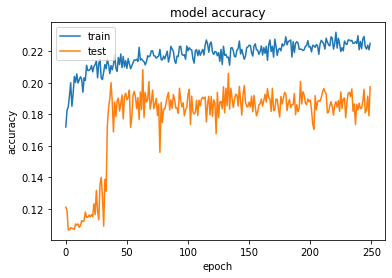

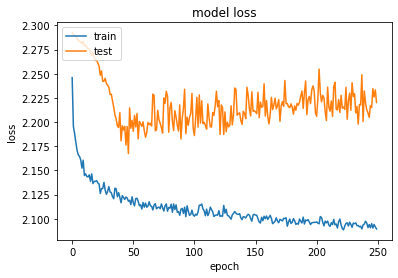

In [23]:
# summarize history for accuracy
plt.plot(model_mel.history['accuracy'])
plt.plot(model_mel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mel.history['loss'])
plt.plot(model_mel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
#Avg Test accuracy and Standart Devision

In [25]:
train_hist = pd.DataFrame(model_mel.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.245997,0.172038,2.292997,0.121191
1,2.195328,0.182485,2.290668,0.119064
2,2.188211,0.184708,2.289558,0.106780
3,2.179099,0.191598,2.289331,0.106780
4,2.170987,0.200044,2.286309,0.108197
...,...,...,...,...
245,2.094925,0.222938,2.215094,0.180959
246,2.090414,0.221383,2.234572,0.182849
247,2.094113,0.223828,2.225989,0.191590
248,2.091550,0.220938,2.233331,0.179069


In [26]:
print(train_hist["val_accuracy"].describe())

count    250.000000
mean       0.177456
std        0.025173
min        0.106780
25%        0.179896
50%        0.186275
75%        0.190409
max        0.208363
Name: val_accuracy, dtype: float64


In [27]:
#checking part

In [29]:
test_hist_avg = pd.DataFrame(model_mel.history).mean()
test_hist_avg

loss            2.109856
accuracy        0.217644
val_loss        2.219012
val_accuracy    0.177456
dtype: float64

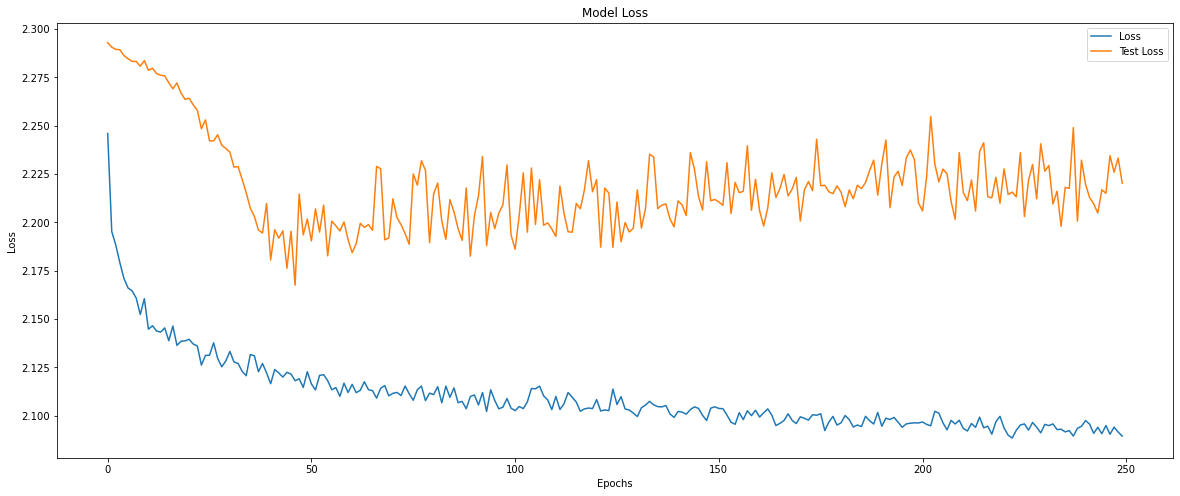

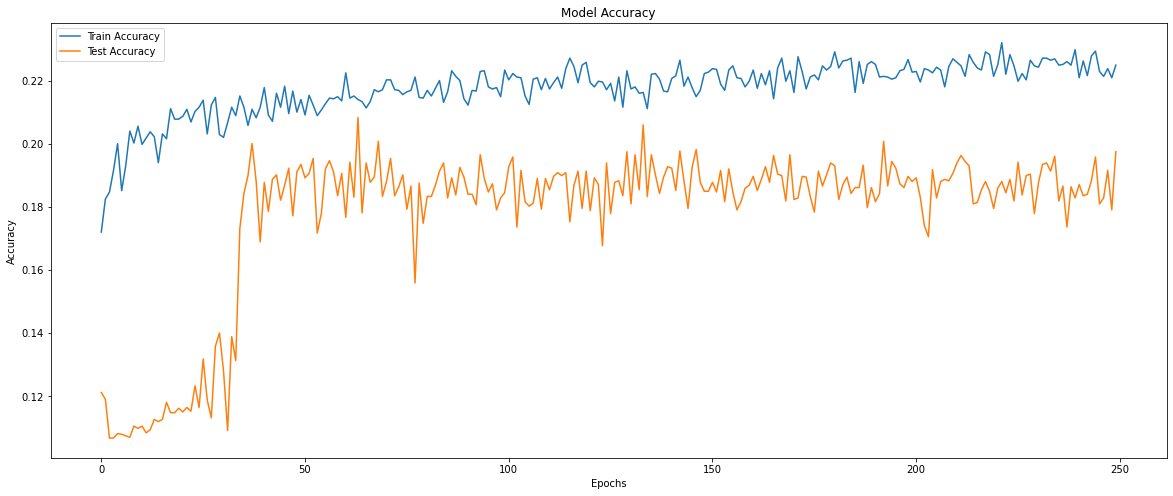

In [30]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [31]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 94   0 157   0  10  51   4 183   1   0]
 [ 38   0  29   0   5  50   1  89   9   0]
 [ 31   0 346   0   6  81   3  24   9   0]
 [ 53   0 190   6  15  80   8 109  39   0]
 [101   0 107   1  18 125   3 142   3   0]
 [ 90   0  95  55   7 122  10  53  51   0]
 [ 19   0  38   4   7  26  17  35  38   0]
 [ 63   0 118   0  12 105   0 147   7   0]
 [ 18   0 155   1   7  71  10  45  86   0]
 [ 69   0 106   7   9 119   7 148  35   0]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.16      0.19      0.17       500
           1       0.00      0.00      0.00       221
           2       0.26      0.69      0.38       500
           3       0.08      0.01      0.02       500
           4       0.19      0.04      0.06       500
           5       0.15      0.25      0.19       483
           6       0.27      0.09      0.14       184
           7       0.15      0.33      0.21       452
           8       0.31      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta